# GCC118 - Programação Matemática
## Universidade Federal de Lavras
### Instituto de Ciências Exatas e Tecnológicas
#### Aluno: Marcos Carvalho Ferreira

In [ ]:
!pip install pulp
import pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 3.6 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


## Problema 1

A Empresa de Viação Aérea Brasileira está estudando a compra de três tipos de aviões: Boeing 717 para as pontes aéreas a curta distância, Boeing 737-500 para vôos domésticos e internacionais de média distância e MD-11 para vôos internacionais de longa distância. Em um estudo preliminar, considerou-se que a capacidade máxima dos aviões a serem comprados será sempre preenchida para efeito de planejamento. Os dados de planejamento constam na
Tabela 1.


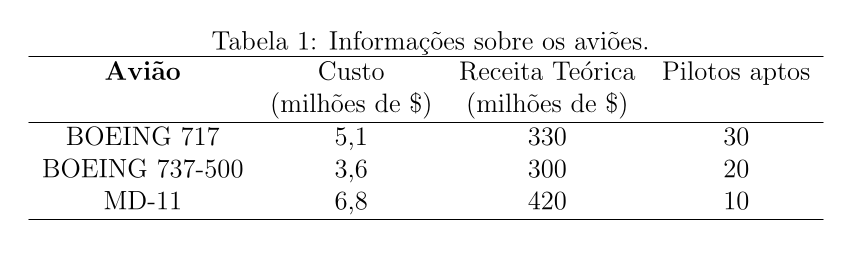

A verba disponı́vel para as compras é de 220 milhões de dólares. Os pilotos de MD-11 podem pilotar todos os aviões da empresa, mas os demais pilotos só podem ser escalados às aeronaves a que foram habilitados. Cada aeronave necessita de dois pilotos para operar. As oficinas de manutenção podem suportar até 40 Boeings 717. Um Boeing 737-500 equivale, em esforço de manutenção, a 3/4 , e um MD-11 a 5/3 , quando referidos ao Boeing 717. Apresenteum modelo que otimize as aquisições de aviões nesta empresa, maximizando as receitas.

## Parâmetros

* custo (milhões \$): $c_1=5{,}1,\; c_2=3{,}6,\; c_3=6{,}8$.
* receita teórica (milhões \$): $r_1=330,\; r_2=300,\; r_3=420$.
* número de pilotos habilitados por tipo: $P_1=30$ (B717), $P_2=20$ (B737), $P_3=10$ (MD-11).
* Pilotos **MD-11** podem pilotar **todos** os tipos; pilotos dos outros tipos **só** pilotam seu tipo.
* cada aeronave precisa de **2 pilotos**.
* verba disponível: $V=220$ (milhões \$).
* manutenção — “equivalente B717”: B717 = 1, B737 = $\frac{3}{4}$, MD-11 = $\frac{5}{3}$. Oficina suporta até 40 (unidades-equivalentes B717).

## Variáveis de decisão
* $x_1$ = número de aeronaves **Boeing 717** a comprar.
* $x_2$ = número de aeronaves **Boeing 737-500** a comprar.
* $x_3$ = número de aeronaves **MD-11** a comprar.
* Pilotos usados localmente
  * $a_1$ = número de pilotos de aeronaves **Boeing 717** alocados.
  * $a_2$ = número de pilotos de aeronaves **Boeing 737-500** alocados.
* Pilotos de aeronave **MD-11** alocados para outras aeronaves:
  * $b_1$ = número de pilotos de aeronve **MD-11** alocado para pilotar uma aeronave **Boeing 717**.
  * $b_2$ = número de pilotos de aeronve **MD-11** alocado para pilotar uma aeronave **Boeing 737-500**.



In [2]:
custo = [5.1, 3.6, 6.8]
receita = [330, 300, 420]
orcamento = 220
manut_lim = 40
manut_coef = [1.0, 0.75, 5.0/3.0]

## Modelo matemático

### Função Objetivo:

$$
\max f = 330x_1 + 300x_2 + 420x_3
$$

### Restrições:

1. A escolha dos aviões deverá respeitar o limite o orçamento que é de 220 milhões:

$$
5.1\,x_1 + 3.6\,x_2 + 6.8\,x_3 \le 220
$$

2. A escolha dos aviões deverá respeitar o limite do da Oficina que suporta até 40 (unidades-equivalentes B717):

$$
1\cdot x_1 + \frac{3}{4}\cdot x_2 + \frac{5}{3}\cdot x_3 \le 40
$$

3. Cada avião precisa ncessariamente de 2 pilotos:

$$
a_1 + b_1 = 2 \cdot x_1\\
a_2 + b_2 = 2 \cdot x_2
$$

4. Limites dos pilotos de suas próprias aeronaves:

$$
\begin{aligned}
a_1 <= 30\\
a_2 <= 20
\end{aligned}
$$

5. Pilotos MD-11 disponíveis com total 10, lembrando que esses pilotos podem pilotar outras aeronaves:

$$
b_1 + b_2 + 2 \cdot x_3 <= 10
$$

6. Domínios:

$$
x_1,x_2,x_3,d_1,d_2 \in \mathbb{Z}_{\ge 0}.
$$

### Declaração do objeto que representa o modelo matemático

In [3]:
modelo = pulp.LpProblem("Compra_Avioes", pulp.LpMaximize)

### Variáveis de Decisão

In [4]:
x1 = pulp.LpVariable("x1_B717", lowBound=0, cat="Integer")
x2 = pulp.LpVariable("x2_B737500", lowBound=0, cat="Integer")
x3 = pulp.LpVariable("x3_MD11", lowBound=0, cat="Integer")

a1 = pulp.LpVariable("a1_pilotos_717_locais", lowBound=0, cat="Integer")
a2 = pulp.LpVariable("a2_pilotos_737_locais", lowBound=0, cat="Integer")
b1 = pulp.LpVariable("b1_MD11_para_717", lowBound=0, cat="Integer")
b2 = pulp.LpVariable("b2_MD11_para_737", lowBound=0, cat="Integer")

### Função Objetivo

In [5]:
modelo += receita[0]*x1 + receita[1]*x2 + receita[2]*x3

### Restrições

In [6]:
modelo += custo[0]*x1 + custo[1]*x2 + custo[2]*x3 <= orcamento, "Orcamento"
modelo += manut_coef[0]*x1 + manut_coef[1]*x2 + manut_coef[2]*x3 <= manut_lim, "Manutencao"

modelo += a1 + b1 == 2 * x1, "Pilotos_717_total"
modelo += a2 + b2 == 2 * x2, "Pilotos_737_total"

modelo += a1 <= 30, "Limite_pilotos_717_locais"
modelo += a2 <= 20, "Limite_pilotos_737_locais"

modelo += b1 + b2 + 2 * x3 <= 10, "Limite_pilotos_MD11"

### Resolvendo o problema

In [7]:
modelo.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/marcos/Área de trabalho/Mestrado/1 - Disciplina Isolada/Programação Matemática/Atividades Práticas/Atividade 1/atividade1/.venv/lib/python3.12/site-packages/pulp/apis/../solverdir/cbc/linux/i64/cbc /tmp/38cfaee2e8534f9f9b94399dc06a3bd6-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/38cfaee2e8534f9f9b94399dc06a3bd6-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 47 RHS
At line 55 BOUNDS
At line 63 ENDATA
Problem MODEL has 7 rows, 7 columns and 17 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 10050 - 0.00 seconds
Cgl0004I processed model has 3 rows, 5 columns (5 integer (0 of which binary)) and 7 elements
Cutoff increment increased from 1e-05 to 29.9999
Cbc0012I Integer solution of -10050 found by DiveCoefficient after 0 iterations and 0

1

## Imprimindo as soluções do problema

In [8]:
print("Status:", pulp.LpStatus[modelo.status])
print("x1 (B-717) =", x1.value())
print("x2 (B-737-500) =", x2.value())
print("x3 (MD-11)=", x3.value())
print("Orcamento =", 5.1*x1.value() + 3.6*x2.value() + 6.8*x3.value())
print("Manutencao =", 1.0*x1.value() + 0.75*x2.value() + (5.0/3.0)*x3.value())
print("a1 (B-717) =", a1.value())
print("a2 (B-737-500) =", a2.value())
print("b1 (MD-11 em B-717) =", b1.value())
print("b2 (MD-11 em B-737-500) =", b2.value())
print("Pilotos MD-11 usados (b1+b2+2*x3) =", b1.value() + b2.value() + 2*x3.value())

Status: Optimal
x1 (B-717) = 15.0
x2 (B-737-500) = 10.0
x3 (MD-11)= 5.0
Orcamento = 146.5
Manutencao = 30.833333333333336
a1 (B-717) = 30.0
a2 (B-737-500) = 20.0
b1 (MD-11 em B-717) = 0.0
b2 (MD-11 em B-737-500) = 0.0
Pilotos MD-11 usados (b1+b2+2*x3) = 10.0
